# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

Before Gathering, we have to import the required libraries needed for our code to work!


In [1]:
#Import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import re
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import os
import json
from timeit import default_timer as timer
from IPython.display import Image

## Gathering Data
- Gather the 3 datasets required for this project and read them into pandas dataframe.

The data to be gathered are:
- The WeRateDogs Twitter archive: **twitter_archice_enhanced.csv**
- The tweet image predictions: **image_predictions.tsv**
- Additional data from the Twitter API: **tweet_json.txt**

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Upload and read the 'twitter_archice_enhanced.csv' data into pandas dataframe.
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

download the 'image-predictions.tsv' file from udacity's server using the Requests library and the following URL: "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [3]:
#Download the URL programmatically then read the .tsv file into a pandas dataframe
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url, auth=('user', 'pass'))

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read the .tsv file into a pandas dataframe using the '/t' as the delimiter
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- read the tweet_json.txt dataset into a dataframe

In [4]:
tweet_list = []
with open('tweet-json.txt', 'r') as fr:
    lines = fr.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_list.append( {'tweet_id':data['id'],
                        'retweet_count':data['retweet_count'],
                        'favourite_count':data['favorite_count']})
df_tweet_json = pd.DataFrame(tweet_list)

In [5]:
df_tweet_json.head()

,favourite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


Finally, I have gathered all three datasets:

    - twitter-archive-enhanced.csv as twitter_archive
    - image-predictions.tsv as image_predictions
    - tweet_json.txt as df_tweet_json


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment on all three dataset

- visually assess the dataset tables:
    1. twitter_archive
    2. image_prediction
    3. df_tweet_json

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_tweet_json

,favourite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


## Programmatic assessment 
- We use pandas methods to programmatically assess the quality and structure of each dataframe one after the other

Starting with the __twitter_archive__ dataframe

In [9]:
# 1. programmatic assessesment on 'twitter_archive' dataframe

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#checking for duplicated rows
twitter_archive.duplicated().sum()

0

There are no duplicated rows in the twitter_archive dataframe

In [11]:
#checking for a sample of the timestamp value to confirm the datatype
twitter_archive.timestamp[0]

'2017-08-01 16:23:56 +0000'

the 'timestamp' datatype should be a timezone datatype instead of an object

In [12]:
#investigating the text column
#dispaly the text for the first row
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [13]:
#Futher investigation, using visual assessment some unusual names were spotted in the dataset eg. 'a', 'an', 'the' etc.
#what are the most popular dog names using .value_counts()
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Bailey        7
Toby          7
Buddy         7
Daisy         7
Jax           6
Oscar         6
Scout         6
Bella         6
Dave          6
Jack          6
Koda          6
Milo          6
Rusty         6
Stanley       6
Leo           6
Sammy         5
           ... 
Emma          1
Cora          1
Dale          1
Beckham       1
Ed            1
Marlee        1
Marty         1
Berb          1
Ralphson      1
Nida          1
Jarvis        1
Maks          1
Sparky        1
Claude        1
Chesney       1
Geno          1
Tess          1
Timofy        1
Iroh          1
Ralphie       1
Dot           1
Brockly       1
Gabby         1
Ralphy        1
his           1
Grady         1
Snoopy        1
Major         1
Pilot         1
Tedrick       1
Name: name, Length: 957,

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# 2. programmatic assessesment on 'image_prediction' dataframe
image_prediction.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
# This is an image for tweet_id 892420643555336193
Image(url = 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg')

In [17]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [18]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [19]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_prediction.duplicated().sum()

0

In [23]:
# Duplicated jpg_url.
sum(image_prediction.jpg_url.duplicated())

# The tweet_id is a unique key to the tweet and not to the rated dog. For this reason, it is a good idea to filter for a unique picture of the dog, which will also remove the retweets.

66

In [24]:
# 3. programmatic assessesment on 'df_tweet_json' dataframe
df_tweet_json.tail(5)

,favourite_count,retweet_count,tweet_id
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


In [25]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
df_tweet_json.describe()

,favourite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


#### Visual Assessment Observation
- twitter_archive: Missing values in variable names: ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). represented as NaN.
- twitter_archive: The 'source' variable has HTML tags, URL, and content in a single column.
- twitter_archive: Inaccurate data: Some names are 'None', 'a', 'an', 'the', 'quite', 'such' etc.
- twitter_archive: Dog/breed type is in seperate columns
- twitter_archive: the variables 'doggo', 'floofer', 'pupper', 'puppo' have 'None' has values instead of NaN, therefore not indicating that there are missing values
- twitter_archive: there are 2356 rows and 17 columns

- image_prediction: There are 2075 rows and 12 columns

#### Progarmmatic Assessment Observation for 'twitter_archive'
- twitter_archive: 'tweet_id' datatype is int instead of string
- twitter_archive: missing data in expanded_urls
- twitter_archive: 'timestamp' datatype is object instead of datetime
- twitter_archive: the 'name' columns has inaccurate names such as 'None', 'a','the', 'an'
- twitter_archive: Missing values in variable names: ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). represented as NaN.
- twitter_archive: The 'rating_numerator' has numerator for ratings above 10 (the denominator). numerator from 0 - 1776
- twitter_archive: the 'rating_denominator' has values from 0 - 170
- twitter_archive: some dog tweets contains tweets with retweets and reply, so the same dog could be recorded more than once
- twitter_archive: 'doggo', 'floofer', 'pupper', 'puppo' are categorical variables and should be in one column 
- twitter_archive: the 'text' column has more than one information in a single column (tweet and URL)



#### Programmatic Assesmment Observation for 'image_prediction'
- image_prediction: 'tweet_id' is int instead of string
- image_prediction: 'p1', 'p2', 'p3' the dog breed names has consistency issues with the spelling using capital and small letter with special characters inbetween names
- image_prediction: It has duplicated images and consequently double entry in the 'jpg_url' column

### Quality issues
1. Some tweets contains retweets and therefore duplicates

2.  Some tweets are replies and therefore duplicate

3. Drop columns: ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), they are not needed

4. Inaccurate data: Some dog names are 'None', 'a', 'an', 'the', 'quite', 'such' etc.

5. 'timestamp' datatype is object instead of datetime

6. Consistency issues in columns (p1, p2, and p3) Dog's breed has no standard. Capital letter or lowercase names

7. Standardize dog ratings

8. tweet_id should be a string not int datatype for the 3 datasets

### Tidiness issues
1. doggo, floofer, pupper, and puppo are categorical variable, and can be combined into one column.

2. the 'text' column has more than one information in a single column (tweet and URL)

3. Merge the 3 tables together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
# Copying the twitter_archive.
twitter_archive_clean = twitter_archive.copy()

# Copying the image_prediction.
image_prediction_clean = image_prediction.copy()

# Copying the df_tweet_json. 
df_tweet_json_clean = df_tweet_json.copy()

### Quality Issue #1: Some tweets contains retweets and therefore duplicates

#### Define: Delete rows that have retweets 'retweeted_status_id

#### Code

In [28]:
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)]

#### Test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2: Some tweets are replies and therefore duplicate

#### Define: Drop any tweet with 'in_reply_status_id'

#### Code

In [30]:
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.in_reply_to_status_id)]

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Quality Issue #3: Drop columns: ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), they are not needed

#### Define: drop columns in 'twitter_archive' that are not needed using .drop() method

#### Code

In [32]:
# get column names
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [33]:
list_col = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id" ,"retweeted_status_user_id","retweeted_status_timestamp"]
twitter_archive_clean.drop(list_col, axis = 1 , inplace = True)

#### Test

In [34]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue #4: Inaccurate data: Some dog names are 'None', 'a', 'an', 'the', 'quite', 'such' etc.

#### Define: Replace inaccurate dog names with an empty string 

#### Code

In [35]:
# Checking for inaccurate dog names that were scraped

inaccurate_names = []

for i in twitter_archive_clean.name:
    # Will check every name start with lowercase.
    if i.islower():
        # If yes will append to inaccurate_names.
        inaccurate_names.append(i)

# The list will filter only unique values
inaccurate_names = list(set(inaccurate_names))

# Printing inaccurate names
inaccurate_names

['not',
 'my',
 'just',
 'getting',
 'actually',
 'incredibly',
 'all',
 'quite',
 'by',
 'unacceptable',
 'space',
 'the',
 'mad',
 'an',
 'officially',
 'a',
 'one',
 'old',
 'very',
 'this',
 'life',
 'infuriating',
 'light',
 'such',
 'his']

#### all the names above are obviously inaccurate dog names, they are not even a persons name

In [36]:
# Loop to replace each inaccurate name with an empty string.
for i in inaccurate_names:
    twitter_archive_clean.name.replace(i, " ", inplace = True)

#### Test

In [37]:
sum(twitter_archive_clean.name.isin(inaccurate_names))

0

### Quality Issue #5: 'timestamp' datatype is object instead of datetime

#### Define:  Change the datatype of 'timestamp' to datetime

#### Code

In [38]:
# convert the timestamp datatype to datetime
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 213.0+ KB


In [40]:
#convert the timestamp value to the day the tweet was made
twitter_archive_clean["timestamp"] = twitter_archive_clean["timestamp"].dt.day_name()

#### Test

In [41]:
# the timestamp was converted to the day the tweet was made
twitter_archive_clean["timestamp"]

0         Tuesday
1         Tuesday
2          Monday
3          Sunday
4        Saturday
5        Saturday
6          Friday
7          Friday
8        Thursday
9       Wednesday
10      Wednesday
11        Tuesday
12        Tuesday
13        Tuesday
14         Monday
15         Monday
16         Sunday
17       Saturday
18       Saturday
20       Thursday
21      Wednesday
22      Wednesday
23      Wednesday
24        Tuesday
25        Tuesday
26         Monday
27         Sunday
28         Sunday
29       Saturday
31       Saturday
          ...    
2326      Tuesday
2327      Tuesday
2328       Monday
2329       Monday
2330       Monday
2331       Monday
2332       Monday
2333       Monday
2334       Monday
2335       Monday
2336       Monday
2337       Monday
2338       Monday
2339       Monday
2340       Monday
2341       Monday
2342       Monday
2343       Monday
2344       Monday
2345       Monday
2346       Monday
2347       Monday
2348       Monday
2349       Monday
2350      

### Quality Issue #6: Consistency issues in columns (p1, p2, and p3) Dog's breed has no standard. Capital letter or lowercase names

#### Define: Standardize the dog breeds (convert all names to lowercases, all spaces and hyphens to underscore)

#### Code

In [42]:
def fix_names(list_names):
    # Convert any uppercase to lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    
    return list_names # Return the "fixed" names.

In [43]:
image_prediction_clean.p1 = fix_names(image_prediction_clean.p1)
image_prediction_clean.p2 = fix_names(image_prediction_clean.p2)
image_prediction_clean.p3 = fix_names(image_prediction_clean.p3)

#### Test

In [44]:
# Subsetting the image_prediction_clean to show only p1, p2, p3, and tweet_id.
image_prediction_clean[['tweet_id','p1','p2','p3']].head(5)

,tweet_id,p1,p2,p3
0,666020888022790149,welsh_springer_spaniel,collie,shetland_sheepdog
1,666029285002620928,redbone,miniature_pinscher,rhodesian_ridgeback
2,666033412701032449,german_shepherd,malinois,bloodhound
3,666044226329800704,rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,miniature_pinscher,rottweiler,doberman


### Issue #7: Standardize the dog ratings

#### Define: Convert numerator and denominator datatypes to float, remove non expected value of denominator and numerator anything different of 10

#### Code

In [45]:
# Converting the rating_numerator and rating_denominator to float.
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

In [46]:
def func(twitter_archive_clean):
    if twitter_archive_clean['rating_numerator'] > 10:
        return 10
    return twitter_archive_clean['rating_numerator']

In [47]:
twitter_archive_clean["rating_numerator"] = twitter_archive_clean.apply(lambda x :func(x), axis = 1)

In [48]:
def func(twitter_archive_clean):
    if twitter_archive_clean['rating_denominator'] > 10:
        return 10
    return twitter_archive_clean['rating_denominator']

In [49]:
twitter_archive_clean["rating_denominator"] = twitter_archive_clean.apply(lambda x :func(x), axis = 1)

#### Test

In [50]:
twitter_archive_clean["rating_numerator"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
5       10.0
6       10.0
7       10.0
8       10.0
9       10.0
10      10.0
11      10.0
12      10.0
13      10.0
14      10.0
15      10.0
16      10.0
17      10.0
18      10.0
20      10.0
21      10.0
22      10.0
23      10.0
24      10.0
25      10.0
26      10.0
27      10.0
28      10.0
29      10.0
31      10.0
        ... 
2326     2.0
2327     7.0
2328     9.0
2329    10.0
2330     6.0
2331     8.0
2332    10.0
2333     9.0
2334     3.0
2335     1.0
2336    10.0
2337    10.0
2338     1.0
2339    10.0
2340     8.0
2341     9.0
2342     6.0
2343    10.0
2344     9.0
2345    10.0
2346     8.0
2347     9.0
2348    10.0
2349     2.0
2350    10.0
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2097, dtype: float64

In [51]:
twitter_archive_clean["rating_denominator"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
5       10.0
6       10.0
7       10.0
8       10.0
9       10.0
10      10.0
11      10.0
12      10.0
13      10.0
14      10.0
15      10.0
16      10.0
17      10.0
18      10.0
20      10.0
21      10.0
22      10.0
23      10.0
24      10.0
25      10.0
26      10.0
27      10.0
28      10.0
29      10.0
31      10.0
        ... 
2326    10.0
2327    10.0
2328    10.0
2329    10.0
2330    10.0
2331    10.0
2332    10.0
2333    10.0
2334    10.0
2335     2.0
2336    10.0
2337    10.0
2338    10.0
2339    10.0
2340    10.0
2341    10.0
2342    10.0
2343    10.0
2344    10.0
2345    10.0
2346    10.0
2347    10.0
2348    10.0
2349    10.0
2350    10.0
2351    10.0
2352    10.0
2353    10.0
2354    10.0
2355    10.0
Name: rating_denominator, Length: 2097, dtype: float64

### Issue #8: tweet_id should be a string not int datatype

#### Define: Convert 'tweet_id' to string

#### Code

In [52]:
# Converting the tweet_id to string for twitter_archive_clean.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

# Converting the tweet_id to string for image_prediction_clean.
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

# Converting the tweet_id to string for df_tweet_json_clean.
df_tweet_json_clean.tweet_id = df_tweet_json_clean.tweet_id.astype(str)

#### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: float64(2), object(10)
memory usage: 213.0+ KB


In [54]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [55]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidyness Issue #1: doggo, floofer, pupper, and puppo are categorical variable, and can be combined into one column.

#### Define: Merge doggo, floofer, pupper and puppo columns into one column

#### Code

In [56]:
# Subset the twt_ach_mstr just to pick the "dogtionary columns".
stage_cols = twitter_archive_clean[['doggo','floofer','pupper','puppo']]

# Replace all "None" values to " ".
stage_cols = stage_cols.replace('None', '') 

# Adding the columns to create a new one.
dogtionary = np.array(stage_cols['doggo']) + np.array(stage_cols['floofer']) + np.array(stage_cols['pupper']) + np.array(stage_cols['puppo'])

# Printing
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dogtionary, dtype: int64

In [57]:
# Fixing the dogs with two classifications.
dogtionary[dogtionary == 'doggopupper'] = 'multiclass'
dogtionary[dogtionary == 'doggofloofer'] = 'multiclass'
dogtionary[dogtionary == 'doggopuppo'] = 'multiclass'

# Printing to see the results.
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

              1761
pupper         221
doggo           72
puppo           23
multiclass      11
floofer          9
Name: dogtionary, dtype: int64

In [58]:
# Reseting the index of twitter_archive_clean.
twitter_archive_clean.reset_index(drop=True, inplace=True)

# Appending dogtionary to twt_ach_mstr.
twitter_archive_clean = pd.concat([twitter_archive_clean, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

In [59]:
#dropping the columns doggo, floofer, pupper, puppo
list2_col = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(list2_col, axis = 1 , inplace = True)

#### Test

In [60]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary'],
      dtype='object')

### Tidyness Issue #2: Merge the 3 clean datasets

#### Define: Merge the clean versions of twitter_archive, image_prediction, and df_tweet_json dataframes to  create a master dataset

#### Code

In [61]:
master_df = twitter_archive_clean.merge(df_tweet_json_clean, on="tweet_id").merge(image_prediction_clean,on = "tweet_id")

#### Test

In [62]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary',
       'favourite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [63]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1971 non-null object
dogtionary            1971 non-null object
favourite_count       1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null 

#Creating a new dog_breed column using the image prediction data
master_df['dog_breed'] = 'None'

for i, row in master_df.iterrows():

    if row.p1_dog:
        master_df.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        master_df.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        master_df.set_value(i, 'dog_breed', row.p3)
    else:
        master_df.set_value(i, 'dog_breed', 'None')

master_df.dog_breed.value_counts()

In [64]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogtionary,favourite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10.0,Phineas,,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10.0,Tilly,,33819,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10.0,Archie,,25461,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10.0,Darla,,42908,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10.0,Franklin,,41048,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True


In [68]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogtionary',
       'favourite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
# Storing the new twitter_dogs df to a new csv file
master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Question 1: What are the top 5 most popular dog names?

In [76]:
master_df['name'].value_counts()[2:7]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Name: name, dtype: int64

### Question 2: What day of the week do people tweet mostly about dogs?

In [74]:
master_df['timestamp'].value_counts()

Monday       326
Wednesday    293
Tuesday      291
Thursday     280
Friday       279
Sunday       254
Saturday     248
Name: timestamp, dtype: int64

### Question 3: What are the top 5 dog breeds in the p1 column?

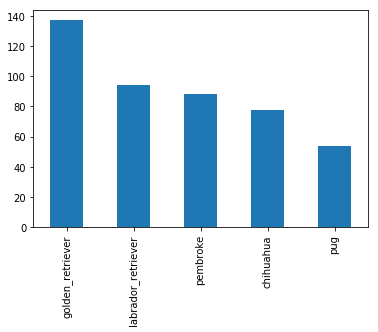

In [77]:
master_df["p1"].value_counts()[:5].plot(kind = "bar") 

### Insights:
1. Charlie, Oliver, Lucy, Cooper and Penny are the top 5 popular dog names

2. Most people tweet on Mondays, with Wednesday coming in second

3. The top 5 dog breeds are golden retriever, labrador_retriever, pembroke, chihuahua and pug.

### Visualization

#### Visualizing the retweet counts, and favorite counts comparison over time.

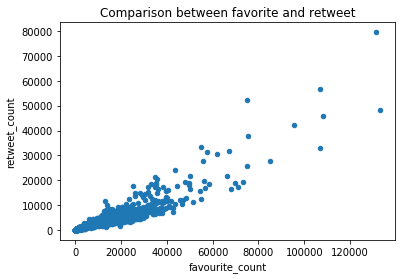

In [70]:
master_df.plot(x='favourite_count', y='retweet_count', kind='scatter', title = 'Comparison between favorite and retweet');

 The above scatter plot shows there is a positive correlation between favorite and retweet.